In [2]:
import numpy as np
import sympy as sp
from scipy.optimize import minimize, fsolve
from scipy.special import roots_legendre
import scipy.linalg as la
import matplotlib.pyplot as plt
from FEM_1D import *
from tools import *
from shape_functions import *
plt.style.use('default')
import copy
fontsize = 15

In [29]:
from sympy import symbols, diff, ln

# 定义符号
r, A4, B4, mu_4, J_z = symbols('r A4 B4 mu_4 J_z')

# 定义函数
A4_r = A4 + B4 * ln(r) - (1/4) * mu_4 * J_z * r**2

# 求一阶导数
dA4_dr = diff(A4_r, r)

# 求二阶导数
d2A4_dr2 = diff(dA4_dr, r)

d2A4_dr2

dA4_dr

B4/r - 0.5*J_z*mu_4*r

In [144]:
def cal_area(r1, r2):
    return np.pi * (r2**2 - r1**2)

r1 = 0.0053
r2 = 0.0063
r3 = 0.0101
r4 = 0.0111
area_in = cal_area(r1, r2)
Jz_in = 100 / area_in
area_out = cal_area(r3, r4)
Jz_out = 100 / area_out
print(Jz_in, Jz_out)

2744050.7429637127 1501461.7272820305


In [90]:
0.85722*0.0115

0.00985803

# (R1, R2)

B02 4.844502220495115e-05
A02 0.0003751047819995934
B2: 0.0 3.1755200550240064
A2: 97.02800697374416 95.39849270639002


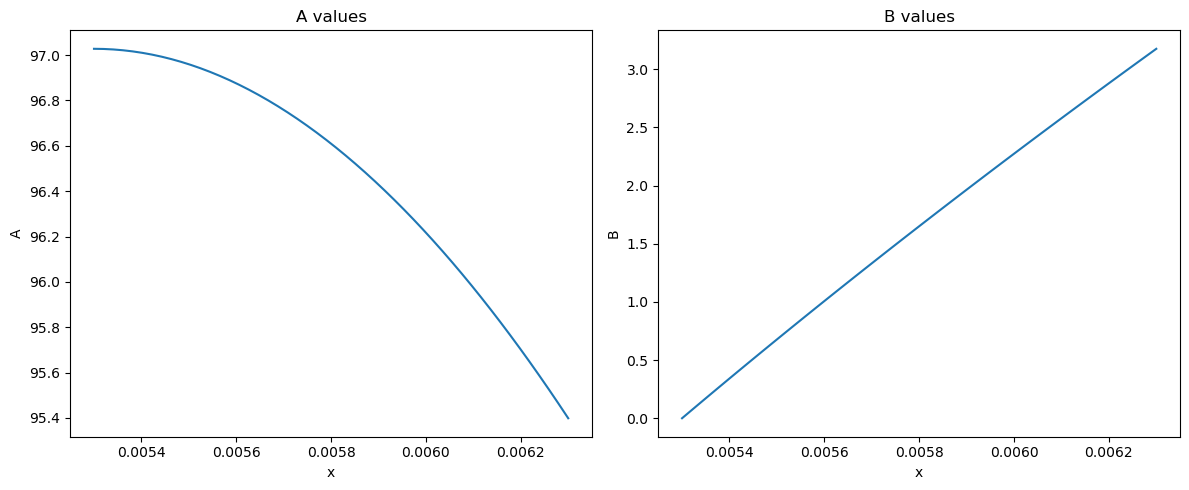

In [161]:
mu_2_val = 1
mu0 = 1.257*10**-6# H/m
J_z_val = Jz_in 
r2 = 0.0063
r1 = 0.0053
def B_func(r):
    B2 = -B02 / r + 0.5 * J_z_val * mu_2_val * mu0 * r
    return B2 * 1000

def solve_B02():
    # B3 =  0.5 * J_z_val * mu_3_val * mu0* 0.0125**2 
    # B02 = -r1* B3_val[0] * 1000 / mu_2_val
    B02 = 0.5 * mu_2_val * mu0 * J_z_val * r1**2
    # print("B3_val[0]", B3_val[0])
    return B02

def A_func(r):
    A2 = A02 + B02* np.log(r) - (1/4) * mu_2_val * mu0 * J_z_val * r**2
    return A2 * 1e6

def solve_A02():
    # A3 = 1.740e-6 - B03* np.log(r)
    A2 = A3_val[0]/1e6 - B02* np.log(r2) + 1/4 * mu_2_val * mu0 * Jz_in * r2**2
    return A2
    

B02 = solve_B02()
print("B02", B02)
x_12 = np.linspace(r1, r2)
A02 = solve_A02()
print("A02", A02)


B2_val = B_func(x_12)
A2_val = A_func(x_12)

print("B2:", B2_val[0], B2_val[-1])
print("A2:", A2_val[0], A2_val[-1])

# 创建一个包含两个子图的图形，子图排列为1行2列
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 第一个子图
ax1.plot(x_12, A2_val)
ax1.set_title('A values')
ax1.set_xlabel('x')
ax1.set_ylabel('A')

# 第二个子图
ax2.plot(x_12, B2_val)
ax2.set_title('B values')
ax2.set_xlabel('x')
ax2.set_ylabel('B')

plt.tight_layout()  # 调整子图间距
plt.show()


# (r2, r3)

B4_val[0] 1.9807699353120034
B03 -0.00020005776346651235
A03 -0.0009183353357741599
B3: 31.75520055024006 19.807699353120036
A3: 95.39849270639002 0.9740710810436605


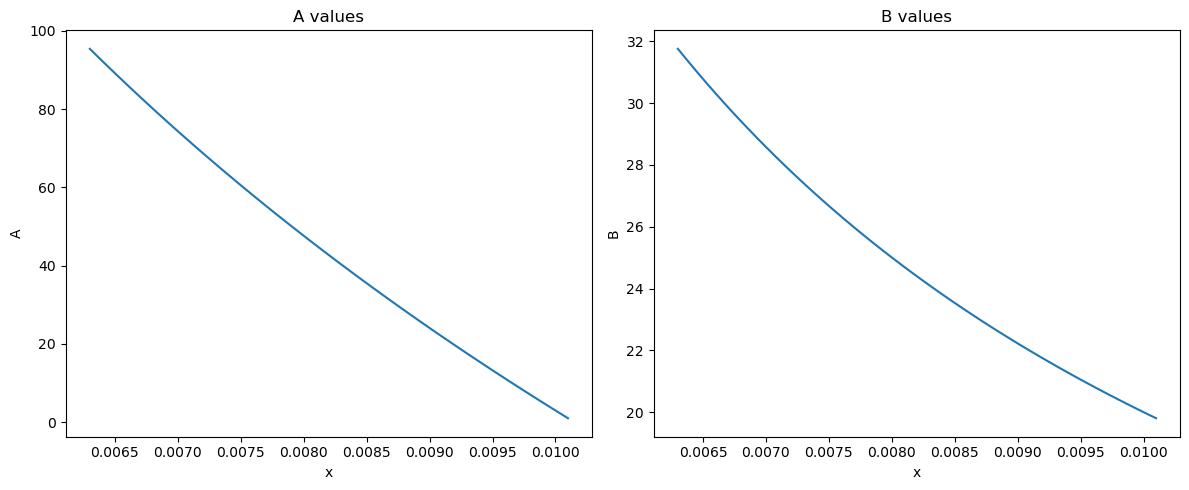

In [181]:
mu_3_val = 10
mu0 = 1.257*10**-6# H/m
J_z_val = 0
r3 = 0.0101
r2 = 0.0063
def B3_func(r):
    B3 = -B03 / r 
    return B3 * 1000

def solve_B03():
    # B3 =  0.5 * J_z_val * mu_3_val * mu0* 0.0125**2 
    B03 = -r3* B4_val[0] * mu_3_val / 1000
    print("B4_val[0]", B4_val[0])
    return B03

def A3_func(r):
    A3 = A03 + B03* np.log(r)
    return A3 * 1e6

def solve_A03():
    # A3 = 1.740e-6 - B03* np.log(r)
    A03 = A4_val[0]/1e6 - B03* np.log(r3)
    
    return A03

B03 = solve_B03()
print("B03", B03)
A03 = solve_A03()
print("A03", A03)


x_23 = np.linspace(r2, r3)
B3_val = B3_func(x_23)
A3_val = A3_func(x_23)

print("B3:", B3_val[0], B3_val[-1])
print("A3:", A3_val[0], A3_val[-1])

# 创建一个包含两个子图的图形，子图排列为1行2列
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 第一个子图
ax1.plot(x_23, A3_val)
ax1.set_title('A values')
ax1.set_xlabel('x')
ax1.set_ylabel('A')

# 第二个子图
ax2.plot(x_23, B3_val)
ax2.set_title('B values')
ax2.set_xlabel('x')
ax2.set_ylabel('B')

plt.tight_layout()  # 调整子图间距
plt.show()


# (r3, r4)

B04 -0.00011626941998447632
A04 -0.0005814412979955557
B4[0] 1.9807699353120034
A4[0] 0.9740710810437146


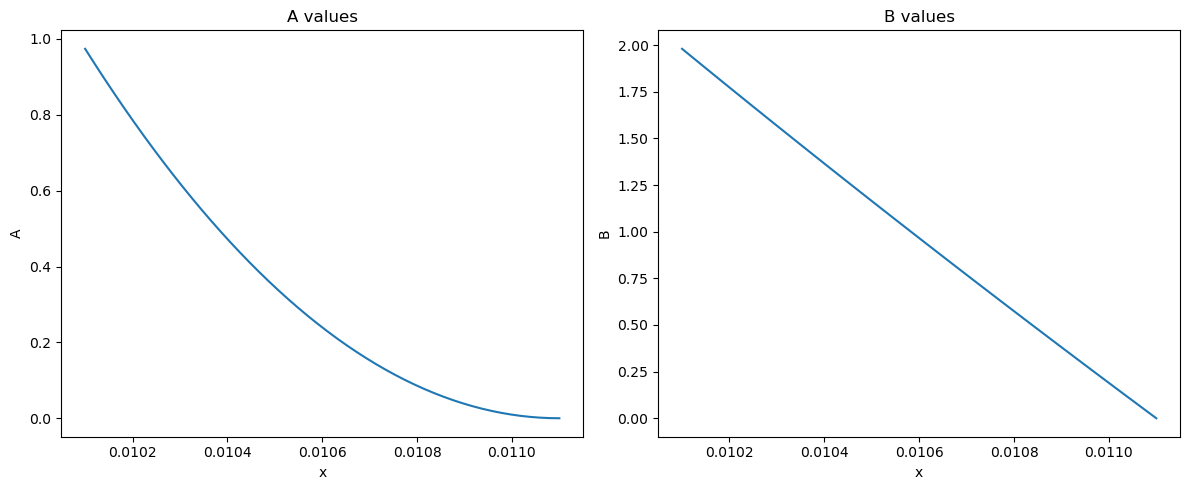

In [151]:
mu_4_val = 1
mu0 = 1.257*10**-6# H/m
J_z_val = -Jz_out
r4 = 0.0111
r3 = 0.0101
def B_func(r):
    B4 = - B04/ r + 0.5 * J_z_val * mu_4_val * mu0* r
    return B4 * 1000

def solve_B04():
    B04 =  0.5 * J_z_val * mu_4_val * mu0 * r4**2 
    return B04 

def A_func(r):
    A4 = A04+ B04* np.log(r) - (1/4) * mu_4_val * mu0* J_z_val * r**2
    return A4 * 1e6

def solve_A04(r):
    A04= -B04* np.log(r) + (1/4) * mu_4_val * mu0 * J_z_val * r**2 
    return A04
    

B04= solve_B04()
print("B04", B04)
x_34 = np.linspace(r3, r4)
A04= solve_A04(r4)
print("A04", A04)



B4_val = B_func(x_34)
A4_val = A_func(x_34)

print("B4[0]", B4_val[0])
print("A4[0]", A4_val[0])

# 创建一个包含两个子图的图形，子图排列为1行2列
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# 第一个子图
ax1.plot(x_34, A4_val)
ax1.set_title('A values')
ax1.set_xlabel('x')
ax1.set_ylabel('A')

# 第二个子图
ax2.plot(x_34, B4_val)
ax2.set_title('B values')
ax2.set_xlabel('x')
ax2.set_ylabel('B')

plt.tight_layout()  # 调整子图间距
plt.show()


In [187]:
import numpy as np

def find_interface_indices(mesh, interfaces):
    # 将interfaces转换为numpy数组，以便使用searchsorted
    interfaces_array = np.array(interfaces)
    
    # 使用searchsorted找到interfaces中每个元素在mesh中的索引
    indices = np.searchsorted(mesh, interfaces_array, side='left')
    
    # 如果界面值正好是mesh中的值，searchsorted会返回正确的索引
    # 如果界面值在mesh的两个值之间，searchsorted会返回较大值的索引
    # 在这种情况下，可能需要根据具体情况调整索引
    
    return indices

# 示例
mesh = [0.0, 0.0043, 0.0053, 0.0063, 0.0101, 0.0103, 0.0111]  # 假设这是你的网格数组，从0到0.012，共500个点
interfaces = [0.0, 0.0053, 0.0063, 0.0101, 0.0111]  # 这是你的界面列表

# 获取界面在网格中的索引
interface_indices = find_interface_indices(mesh, interfaces)
print(interface_indices)
mesh


[0 2 3 4 6]


[0.0, 0.0043, 0.0053, 0.0063, 0.0101, 0.0103, 0.0111]

In [29]:
import numpy as np
def exact_solution(r, A0=71, muJz=20):
    return A0 - 1/4 * muJz * r**2

# # 随机从0到1之间抽取r的值
r = np.random.uniform(0, 1, size=(1000, 1))  # 假设我们需要1000个样本

# 使用exact_solution函数计算对应的解
A0 = 71
muJz = 20
exact_solution_values = exact_solution(r, A0, muJz)
# 将r和对应的解保存到npy文件中
# np.savez("/Users/xusenqin/Desktop/Advanced-Finite-Element-Methods/FEM_1D_TUe/datasets/Poission.npz", r=r, solution=exact_solution_values)



In [ ]:
def find_element_interface(mesh_elem, interfaces):
    # mesh_elem 是一个包含两个元素的列表，表示当前元素的起始和结束位置
    for i in range(len(interfaces) - 1):
        # 检查当前元素是否位于第 i 个区间内
        if interfaces[i] <= mesh_elem[0] and mesh_elem[1] <= interfaces[i + 1]:
            return i  # 返回当前元素所在的区间索引
    return None  # 如果没有找到符合条件的区间，则返回 None


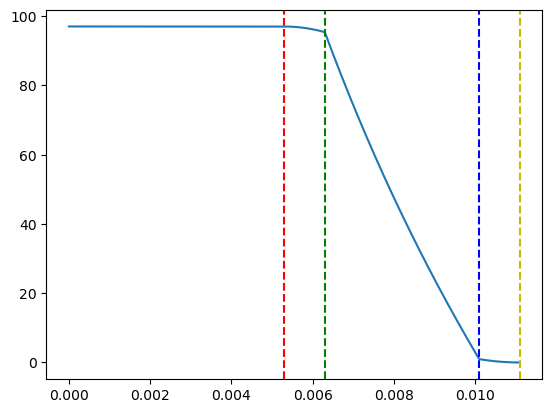

In [198]:
consts = {"r1":0.0053, "r2":0.0063, "r3":0.0101, "r4":0.0111,"Jz_in":1501461.7272820305, "Jz_out":2744050.7429637127, "Params":[{"A":97.02800697374416/1e6, "B":0, "Jz": 0, "mu":1}, {"A": 0.0003751047819995934, "B":4.844502220495115e-05, "Jz":2744050.7429637127, "mu":1 }, {"A":-0.0009183353357741599, "B":-0.00020005776346651235, "Jz":0, "mu":10}, {"A":-0.0005814412979955557, "B":-0.00011626941998447632, "Jz":-1501461.7272820305, "mu":1}] }
r1 = consts["r1"]
r2 = consts["r2"]
r3 = consts["r3"]
r4 = consts["r4"]
def find_region(value):
    r1 = consts["r1"]
    r2 = consts["r2"]
    r3 = consts["r3"]
    r4 = consts["r4"]

    # 判断值落在哪个区间
    if 0 <= value < r1: 
        return int(0)
    elif r1 <= value < r2:
        return int(1)
    elif r2 <= value < r3:
        return int(2)
    elif r3 <= value <= r4:
        return int(3)
    else:
        raise ValueError("Value {} is less than 0 or larger than r4".format(value))

class exact_fn():
    def __init__(self,):
        self.name = "RHS"
        self.scale = [0, 1]
        self.mu = 1
        self.mu0 = 1.257*10**-6 # H/m
        self.Jz = -1326291.1924324587
        self.B0 = -0.0001302459397568438
        self.A0 = -0.0006358641469510412

    def __call__(self, x):
        x = np.array(x)  
        result = np.zeros_like(x)
        
        for i in range(len(x)):
            x_ = x[i]
            # print(x_)
            region = find_region(x_)
            Param = consts["Params"][region]
            A0 = Param["A"]
            B0 = Param["B"]
            mu = Param["mu"]
            Jz = Param["Jz"]
            muJz = mu * self.mu0 * Jz
            if x_ == 0:
                func1 = A0 - 1/4 * muJz * x_**2 
            else:
                func1 = A0 + B0*np.log(x_) - 1/4 * muJz * x_**2 
            result[i] = func1
        return result * 1e6

exact_func = exact_fn()
x_data = np.linspace(0, consts["r4"], 5000)
y_data = exact_func(x_data)
plt.plot(x_data, y_data)
# 画出竖线
plt.axvline(x=r1, color='r', linestyle='--', label='r1')  # 红色虚线
plt.axvline(x=r2, color='g', linestyle='--', label='r2')  # 绿色虚线
plt.axvline(x=r3, color='b', linestyle='--', label='r3')  # 蓝色虚线
plt.axvline(x=r4, color='y', linestyle='--', label='r4')  # 黄色虚线

y_data[0]

np.savez("/Users/xusenqin/Desktop/Advanced-Finite-Element-Methods/FEM_1D_TUe/datasets/Poission.npz", r=x_data, solution=y_data)




In [199]:

def gen_traindata(num):
    # 更新为实际的文件路径
    data = np.load("/Users/xusenqin/Desktop/Advanced-Finite-Element-Methods/FEM_1D_TUe/datasets/Poission.npz")
    return data["r"][:num].reshape(-1, 1), data["solution"][:num].reshape(-1, 1)

def sol(x):
    # solution is u(x) = sin(pi*x), q(x) = -pi^2 * sin(pi*x)
    return np.sin(np.pi * x)


data = gen_traindata(2)
data[1]


array([[97.02800697],
       [97.02800697]])

In [58]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, paddle"""
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("default")


def gen_traindata(num=100):
    # 更新为实际的文件路径
    data = np.load("/Users/xusenqin/Desktop/Advanced-Finite-Element-Methods/FEM_1D_TUe/datasets/Poission.npz")
    r = data["r"].reshape(-1, 1)  
    solution = data["solution"].reshape(-1, 1) 

    # 生成随机索引
    indices = np.random.choice(r.shape[0], size=num, replace=False)
    
    # 使用随机索引选择数据
    return r[indices], solution[indices]

K = dde.Variable(20)

def pde(x, y):
    u, q = y[:, 0:1], y[:, 1:2]
    du_dx = dde.grad.jacobian(y, x, i=0, j=0)
    dA_z_dr  = dde.grad.jacobian(x*du_dx, x, i=0, j=0)
    return dA_z_dr/x + q



# def sol(x):
#     A0 = 71
#     muJz = 20
#     return A0 - 1/4 * muJz * x**2
sol = exact_fn

geom = dde.geometry.Interval(-1, 1)


right_bc = dde.icbc.DirichletBC(geom, lambda x: 66, lambda x, on_boundary: on_boundary and np.isclose(x[0], 1), component=0)

neumann_bc = dde.icbc.NeumannBC(geom, lambda x: 0, lambda x, on_boundary: on_boundary and np.isclose(x[0], 0), component=0)

ob_x, ob_u = gen_traindata()
observe_u = dde.icbc.PointSetBC(ob_x, ob_u, component=0)

data = dde.data.PDE(
    geom,
    pde,
    [right_bc, neumann_bc, observe_u],  # 包括所有边界条件和观测点边界条件
    num_domain=200,
    num_boundary=2,
    anchors=ob_x,
    num_test=1000,
)

neurons = 100
net = dde.nn.PFNN([1, [neurons, neurons], [neurons, neurons], [neurons, neurons], 2], "tanh", "Glorot uniform")

model = dde.Model(data, net)
model.compile("adam", lr=0.0001, loss_weights=[1, 100, 1000])
losshistory, train_state = model.train(iterations=200)
print(losshistory)
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# view results
x = geom.uniform_points(500)
yhat = model.predict(x)
uhat, qhat = yhat[:, 0:1], yhat[:, 1:2]

utrue = sol(x)
print("l2 relative error for u: " + str(dde.metrics.l2_relative_error(utrue, uhat)))
plt.figure()
plt.plot(x, utrue, "-", label="u_true")
plt.plot(x, uhat, "--", label="u_NN")
plt.legend()

qtrue = -np.pi ** 2 * np.sin(np.pi * x)
print("l2 relative error for q: " + str(dde.metrics.l2_relative_error(qtrue, qhat)))
plt.figure()
plt.plot(x, qtrue, "-", label="q_true")
plt.plot(x, qhat, "--", label="q_NN")
plt.legend()

plt.show()

Compiling model...
'compile' took 0.000789 s

Training model...



RuntimeError: The size of tensor a (5) must match the size of tensor b (3) at non-singleton dimension 0

In [191]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, paddle"""
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("default")

def gen_traindata(num):
    # generate num equally-spaced points from -1 to 1
    xvals = np.linspace(-1, 1, num).reshape(num, 1)
    uvals = np.sin(np.pi * xvals)
    return xvals, uvals
data = gen_traindata(2)
data[0]

array([[-1.],
       [ 1.]])

Compiling model...
'compile' took 0.000770 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [5.90e-03, 3.03e+00, 3.79e+02]    [5.95e-03, 3.03e+00, 3.79e+02]    []  
20        [4.04e-03, 6.56e+00, 3.36e+02]    [4.07e-03, 6.56e+00, 3.36e+02]    []  

Best model at step 20:
  train loss: 3.42e+02
  test loss: 3.42e+02
  test metric: []

'train' took 0.067070 s

Saving loss history to /Users/xusenqin/Desktop/Advanced-Finite-Element-Methods/FEM_1D_TUe/loss.dat ...
Saving training data to /Users/xusenqin/Desktop/Advanced-Finite-Element-Methods/FEM_1D_TUe/train.dat ...
Saving test data to /Users/xusenqin/Desktop/Advanced-Finite-Element-Methods/FEM_1D_TUe/test.dat ...


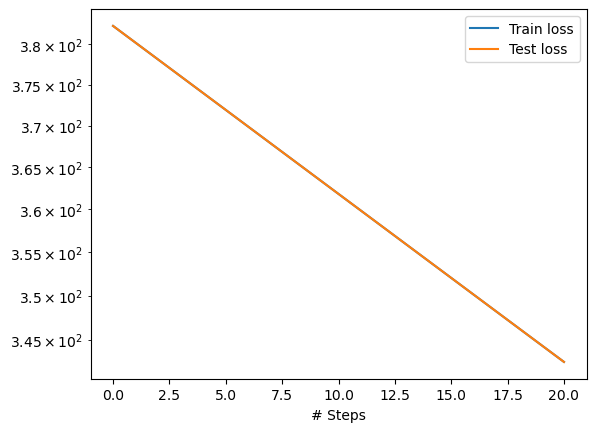

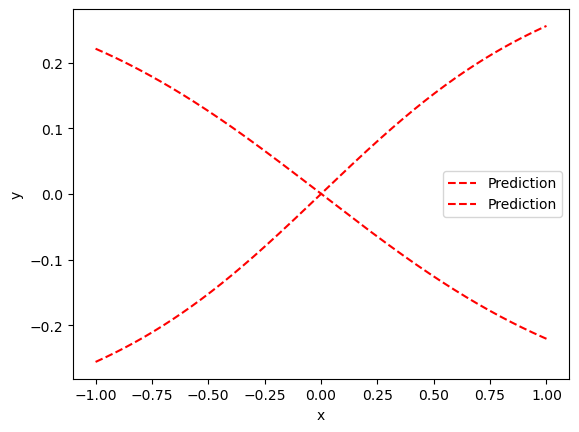

l2 relative error for u: 0.8230881
l2 relative error for q: 0.9842025


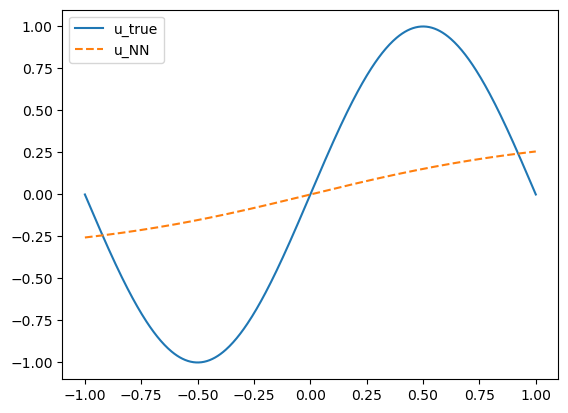

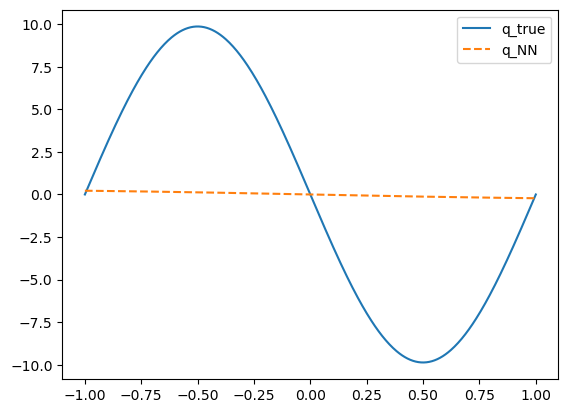

In [60]:


def pde(x, y):
    u, q = y[:, 0:1], y[:, 1:2]
    du_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
    return -du_xx + q


def sol(x):
    # solution is u(x) = sin(pi*x), q(x) = -pi^2 * sin(pi*x)
    return np.sin(np.pi * x)


geom = dde.geometry.Interval(-1, 1)

bc = dde.icbc.DirichletBC(geom, sol, lambda _, on_boundary: on_boundary, component=0)
ob_x, ob_u = gen_traindata(100)
observe_u = dde.icbc.PointSetBC(ob_x, ob_u, component=0)

data = dde.data.PDE(
    geom,
    pde,
    [bc, observe_u],
    num_domain=200,
    num_boundary=2,
    anchors=ob_x,
    num_test=1000,
)

net = dde.nn.PFNN([1, [20, 20], [20, 20], [20, 20], 2], "tanh", "Glorot uniform")

model = dde.Model(data, net)
model.compile("adam", lr=0.0001, loss_weights=[1, 100, 1000])
losshistory, train_state = model.train(iterations=20)
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# view results
x = geom.uniform_points(500)
yhat = model.predict(x)
uhat, qhat = yhat[:, 0:1], yhat[:, 1:2]

utrue = np.sin(np.pi * x)
print("l2 relative error for u: " + str(dde.metrics.l2_relative_error(utrue, uhat)))
plt.figure()
plt.plot(x, utrue, "-", label="u_true")
plt.plot(x, uhat, "--", label="u_NN")
plt.legend()

qtrue = -np.pi ** 2 * np.sin(np.pi * x)
print("l2 relative error for q: " + str(dde.metrics.l2_relative_error(qtrue, qhat)))
plt.figure()
plt.plot(x, qtrue, "-", label="q_true")
plt.plot(x, qhat, "--", label="q_NN")
plt.legend()

plt.show()

In [67]:
def FEM_1D(domain = (0, 1), interfaces = [ 0, .25, .5, .75, 1], num_elems = 3):
    N=3
    num_elems_per_segment = num_elems
    num_elems = len(interfaces) * num_elems_per_segment
    # 初始化网格数组
    mesh = np.array([])

    # 遍历界面列表，为每个子区间生成网格
    for i in range(len(interfaces)-1):
        # 当前子区间的起始点和结束点
        start, end = interfaces[i], interfaces[i+1]

        # 在当前子区间内生成等间距的节点
        # np.linspace包括区间的起始和结束点，但为避免重复添加界面节点，我们从第二个节点开始添加（当i不为0时）
        sub_mesh = np.linspace(start, end, num_elems_per_segment + 1)
        if i > 0:
            sub_mesh = sub_mesh[1:]  # 移除子网格的第一个节点，因为它是上一个子网格的最后一个节点

        # 将子网格添加到总网格中
        mesh = np.concatenate((mesh, sub_mesh))
    return mesh

mesh = FEM_1D()
mesh

array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
       0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
       0.83333333, 0.91666667, 1.        ])

In [ ]:
import numpy as np
from scipy.integrate import quad
from scipy.linalg import block_diag

# 定义子域
subdomains = [(0, 0.25), (0.25, 0.5), (0.5, 0.75), (0.75, 1)]

# 定义每个子域的 Jz 值
Jz_values = [Jz1, Jz2, Jz3, Jz4]

# 定义每个子域的节点数和单元数
num_nodes_per_subdomain = 10
num_elements_per_subdomain = num_nodes_per_subdomain - 1

# 初始化全局刚度矩阵和载荷向量
K_global = np.zeros((num_nodes_per_subdomain * len(subdomains), num_nodes_per_subdomain * len(subdomains)))
F_global = np.zeros(num_nodes_per_subdomain * len(subdomains))

# 遍历每个子域
for i, subdomain in enumerate(subdomains):
    # 定义当前子域的局部刚度矩阵和载荷向量
    K_local = np.zeros((num_nodes_per_subdomain, num_nodes_per_subdomain))
    F_local = np.zeros(num_nodes_per_subdomain)

    # 离散化子域并计算局部刚度矩阵和载荷向量
    # （具体的实现取决于特定问题和数值方法）

    # 将局部刚度矩阵和载荷向量组装到全局矩阵和向量中
    start_idx = i * num_nodes_per_subdomain
    end_idx = (i + 1) * num_nodes_per_subdomain
    K_global[start_idx:end_idx, start_idx:end_idx] += K_local
    F_global[start_idx:end_idx] += F_local

    # 在每个子域的右端应用诺伊曼边界条件
    if i < len(subdomains) - 1:
        K_global[end_idx, end_idx] += K_right_neumann
        F_global[end_idx] += Jz_values[i + 1]  # 诺伊曼边界条件值

# 在每个子域的左端应用狄利克雷边界条件
for i in range(len(subdomains)):
    start_idx = i * num_nodes_per_subdomain
    K_global[start_idx, :] = 0
    K_global[start_idx, start_idx] = 1
    F_global[start_idx] = Jz_values[i]  # 狄利克雷边界条件值

# 解方程系统
solution = np.linalg.solve(K_global, F_global)

# 打印或使用得到的解
print(solution)

In [ ]:
import numpy as np
from scipy.integrate import quad
from scipy.linalg import block_diag

# 定义子域
subdomains = [(0, 0.25), (0.25, 0.5), (0.5, 0.75), (0.75, 1)]

# 定义每个子域的 Jz 值
Jz_values = [Jz1, Jz2, Jz3, Jz4]

# 定义每个子域的节点数和单元数
num_nodes_per_subdomain = 10
num_elements_per_subdomain = num_nodes_per_subdomain - 1

# 初始化全局刚度矩阵和载荷向量
K_global = np.zeros((num_nodes_per_subdomain * len(subdomains), num_nodes_per_subdomain * len(subdomains)))
F_global = np.zeros(num_nodes_per_subdomain * len(subdomains))

# 遍历每个子域
for i, subdomain in enumerate(subdomains):
    # 定义当前子域的局部刚度矩阵和载荷向量
    K_local = np.zeros((num_nodes_per_subdomain, num_nodes_per_subdomain))
    F_local = np.zeros(num_nodes_per_subdomain)

    # 离散化子域并计算局部刚度矩阵和载荷向量
    # （具体的实现取决于特定问题和数值方法）

    # 将局部刚度矩阵和载荷向量组装到全局矩阵和向量中
    start_idx = i * num_nodes_per_subdomain
    end_idx = (i + 1) * num_nodes_per_subdomain
    K_global[start_idx:end_idx, start_idx:end_idx] += K_local
    F_global[start_idx:end_idx] += F_local

    # 在每个子域的右端应用诺伊曼边界条件
    if i < len(subdomains) - 1:
        K_global[end_idx, end_idx] += K_right_neumann
        F_global[end_idx] += Jz_values[i + 1]  # 诺伊曼边界条件值

# 在每个子域的左端应用狄利克雷边界条件
for i in range(len(subdomains)):
    start_idx = i * num_nodes_per_subdomain
    K_global[start_idx, :] = 0
    K_global[start_idx, start_idx] = 1
    F_global[start_idx] = Jz_values[i]  # 狄利克雷边界条件值

# 解方程系统
solution = np.linalg.solve(K_global, F_global)

# 打印或使用得到的解
print(solution)

In [202]:
import numpy as np
from scipy.integrate import quad


def basis_function(r, i, nodes):
    """
    Linear basis function for the i-th element.
    """
    return (nodes[i + 1] - r) / (nodes[i + 1] - nodes[i])


def stiffness_matrix_element(i, j, nodes):
    """
    Calculate the (i, j)-th element of the stiffness matrix.
    """

    def integrand(r):
        return basis_function_derivative(r, i, nodes) * basis_function_derivative(r, j, nodes)

    result, _ = quad(integrand, nodes[i], nodes[i + 1])
    return result


def basis_function_derivative(r, i, nodes):
    """
    Derivative of the linear basis function for the i-th element.
    """
    return -1 / (nodes[i + 1] - nodes[i])


def load_vector_element(i, nodes):
    """
    Calculate the i-th element of the load vector.
    """

    def integrand(r):
        return f(r) * basis_function(r, i, nodes)

    result, _ = quad(integrand, nodes[i], nodes[i + 1])
    return result


def f(r):
    """
    The given expression for the differential equation.
    """
    # Replace this with the actual expression for f(r)
    return 1


def assemble_global_matrix_and_vector(nodes):
    num_nodes = len(nodes) - 1
    K_global = np.zeros((num_nodes, num_nodes))
    F_global = np.zeros(num_nodes)

    for i in range(num_nodes):
        for j in range(num_nodes):
            K_global[i, j] += stiffness_matrix_element(i, j, nodes)

        F_global[i] += load_vector_element(i, nodes)

    return K_global, F_global


def apply_neumann_boundary_condition(K_global, F_global, neumann_value):
    """
    Apply Neumann boundary condition at the right boundary.
    """
    # Modify the last row of the stiffness matrix and the last element of the load vector
    K_global[-1, -1] += neumann_value


# Define the domain and discretize it
nodes = np.linspace(0, 1, num=5)  # Adjust the number of nodes as needed

# Assemble the global stiffness matrix and load vector
K_global, F_global = assemble_global_matrix_and_vector(nodes)

# Apply Neumann boundary condition
neumann_value = 0  # Replace with the actual Neumann boundary condition value
apply_neumann_boundary_condition(K_global, F_global, neumann_value)

# Solve the system of equations
print(K_global, F_global)
solution = np.linalg.solve(K_global, F_global)

# Print or use the solution as needed
print(solution)


[[4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]
 [4. 4. 4. 4.]] [0.125 0.125 0.125 0.125]


LinAlgError: Singular matrix